In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#%cd /content/gdrive/My\ Drive
%cd /content

/content


In [ ]:
from getpass import getpass
import os

user = getpass('User')
password = getpass('Password')
os.environ['GIT_AUTH'] = user + ':' + password

!git clone https://$GIT_AUTH@github.com/Ace95/DeepLearning_Project.git  

User··········
Password··········
Cloning into 'DeepLearning_Project'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 203221 (delta 44), reused 90 (delta 19), pack-reused 203103
Receiving objects: 100% (203221/203221), 1.44 GiB | 16.01 MiB/s, done.
Resolving deltas: 100% (396/396), done.
Checking out files: 100% (42058/42058), done.


Change to directory of our code

In [ ]:
#%cd /content/gdrive/My\ Drive/DeepLearning_Project/CNNfromScratch/ # Run from  GDrive

%cd /content/DeepLearning_Project/CNNfromScratch/ 


/content/DeepLearning_Project/CNNfromScratch


### General Imports and functions definitions

In [ ]:
"""
Created on Fri Apr 17 15:40:21 2020

@author: Nicolaas Ruberg
"""
import os
import pandas as pd
import matplotlib.pyplot as plt

def save_history(history,fileName):
    hist_df = pd.DataFrame(history)
    with open(fileName,mode='w') as f:
        hist_df.to_csv(f)

def save_elapsedTime(elapsedTime,fileName):
    f = open(fileName,'a+')
    f.write('%%Elapsed Time: {:.2f}m. \n'.format(elapsedTime/60))
    f.close()
        
def find_next_file_history(dirHistory, fileName):
    if not os.path.exists(dirHistory):
        os.makedirs(dirHistory)
    files = os.listdir(dirHistory)
    if len(files) > 0:
        for f in files:
            if f.endswith('.csv'):
                return (dirHistory+'/'+fileName[0:fileName.find('.')]
                        +'_' + str(len(files)) +'.csv')
            else:
                return (dirHistory+'/'+fileName)
    else:
        return (dirHistory+'/'+fileName)
def show_history(history):
    ACC = 'acc' # for keras
    VAL_ACC = 'val_acc'
    plt.plot(history.history[ACC]) # on keras wo tensorflow the parameter is 'acc'
    plt.plot(history.history[VAL_ACC]) # on keras wo tensorflow the parameter is 'acc'
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Training accuracy', 'Validation accuracy'], loc='best')
    
    plt.figure()
    plt.title('Training and validation loss')
    plt.plot(history.history['loss'], 'red', label='Training loss')
    plt.plot(history.history['val_loss'], 'blue', label='Validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Training loss', 'Validation loss'], loc='best')
    plt.savefig('./models/plot_history.png')
    plt.show()
    # Let's save our result for further analysi
  
    

In [ ]:
import time

import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image  import ImageDataGenerator
# from  myUtils import find_next_file_history, save_history, show_history, save_elapsedTime

# Some variables
#imageShape=(224,224)
imageShape=(218,178) #Celeba croped image shape
histFileName = 'historyCNN4_src_light.csv'
dirHistFileName = './history'
numEpochs=20
modelsFile = './models/CNN4_celeba_model_src_light.h5'
trainDIR='../source_light/train'
valDIR='../source_light/valid'
testDIR='../source_light/test'

Using TensorFlow backend.


In [ ]:
cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=imageShape+(3,))) #diff from example 
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.7))

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.7))

cnn4.add(Dense(3, activation='softmax')) ## Final number of categories

cnn4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator()

# load and iterate training dataset
train_generator = train_datagen.flow_from_directory(trainDIR,
                                                    target_size=imageShape,
                                                    color_mode='rgb',
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    shuffle= True)

val_generator = train_datagen.flow_from_directory(valDIR,
    target_size=imageShape,
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)


Found 11000 images belonging to 3 classes.
Found 1000 images belonging to 3 classes.


In [ ]:
start = time.time()
numEpochs=10
step_size_train = train_generator.n//train_generator.batch_size
step_size_val = val_generator.n//val_generator.batch_size
history = cnn4.fit_generator(generator=train_generator,steps_per_epoch=step_size_train,epochs=numEpochs,
                    validation_data=val_generator,validation_steps=step_size_val)

cnn4.save('./models/CNN4_celeba_model_src_light_10epochs.h5')
end = time.time()
elapsedTime= (end - start)
print("Elapsed Time:")

Epoch 1/10
343/343 [==============================] - 131s 381ms/step - loss: 1.0808 - acc: 0.6618 - val_loss: 3.0667 - val_acc: 0.4234
Epoch 2/10
343/343 [==============================] - 130s 379ms/step - loss: 0.5886 - acc: 0.7808 - val_loss: 1.0459 - val_acc: 0.6467
Epoch 3/10
343/343 [==============================] - 130s 379ms/step - loss: 0.4737 - acc: 0.8163 - val_loss: 0.8429 - val_acc: 0.6240
Epoch 4/10
343/343 [==============================] - 130s 379ms/step - loss: 0.4336 - acc: 0.8347 - val_loss: 0.8491 - val_acc: 0.6581
Epoch 5/10
343/343 [==============================] - 130s 378ms/step - loss: 0.4061 - acc: 0.8448 - val_loss: 0.9641 - val_acc: 0.6519
Epoch 6/10
343/343 [==============================] - 130s 378ms/step - loss: 0.4079 - acc: 0.8459 - val_loss: 1.1954 - val_acc: 0.6767
Epoch 7/10
343/343 [==============================] - 130s 379ms/step - loss: 0.3798 - acc: 0.8604 - val_loss: 0.5348 - val_acc: 0.6994
Epoch 8/10
343/343 [============================

In [ ]:
val_test = train_datagen.flow_from_directory(
    directory=testDIR,
    target_size=imageShape,
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)


step_size_val = val_test.n//val_test.batch_size
score1 = cnn4.evaluate_generator(generator=val_test,steps=step_size_val)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Found 1000 images belonging to 3 classes.
Test loss: 0.8066215515136719
Test accuracy: 0.6864919066429138


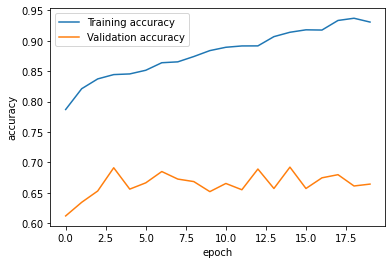

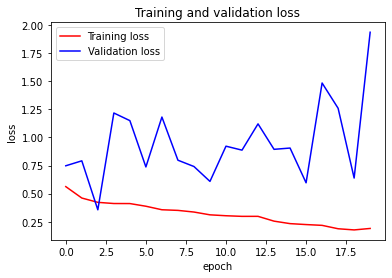

In [ ]:
show_history(history)
finalHistoryFile=find_next_file_history(dirHistFileName,histFileName)
save_history(history.history,finalHistoryFile)

save_elapsedTime(elapsedTime,finalHistoryFile)


In [ ]:
# Final execution with 10 epochs
numEpochs = 10
step_size_train = train_generator.n//train_generator.batch_size
step_size_val = val_generator.n//val_generator.batch_size
history = cnn4.fit_generator(generator=train_generator,steps_per_epoch=step_size_train,epochs=numEpochs,
                    validation_data=val_generator,validation_steps=step_size_val)

cnn4.save('./models/CNN4_celeba_model-10epochs.h5')
end = time.time()
elapsedTime= (end - start)
print("Elapsed Time:")
print("\t\t{:.2f}m".format(elapsedTime/60))